In [1]:
import torch
from torch import nn
import torch.utils.data as Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from preprocessing import StandardScaler, Split
from model import Regressor

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
epochs = 500
batch_size = 512
best_model = np.inf
timesteps = 90

In [3]:
df = pd.read_csv('bdi.csv')
df.fillna(method='ffill', inplace=True)
data = df['bdi'].values

In [4]:
W = 2
H = 89
x = np.array([data[i-W:i] for i in range(W, len(data))])
x = np.array([x[i-H:i] for i in range(H, len(x)+1)]).reshape(-1, H, 1, W)
y = np.array([data[i] for i in range(90, len(data))]).reshape(-1, 1)

In [5]:
x_train, y_train, x_val, y_val, x_test, y_test = Split(x, y)

In [6]:
scaler = StandardScaler(y_train)
x_train = scaler.transform(x_train)
y_train = scaler.transform(y_train)
x_val = scaler.transform(x_val)
y_val = scaler.transform(y_val)
x_test = scaler.transform(x_test)

In [7]:
x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.FloatTensor(y_train).to(device)
x_val = torch.FloatTensor(x_val).to(device)
y_val = torch.FloatTensor(y_val).to(device)
x_test = torch.FloatTensor(x_test).to(device)

In [8]:
dataset = Data.TensorDataset(x_train, y_train)
dataloader = Data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

In [9]:
model = Regressor().to(device)
print(model)

Regressor(
  (cnn1): Conv1d(1, 64, kernel_size=(1,), stride=(1,))
  (cnn2): Conv1d(64, 32, kernel_size=(1,), stride=(1,))
  (ft): Flatten(start_dim=2, end_dim=-1)
  (lstm): LSTM(64, 32, num_layers=2, batch_first=True)
  (sequential): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [11]:
history = dict()
history['loss'] = []
history['val_loss'] = []
filepath = 'checkpoint.pt'

In [11]:
for epoch in range(epochs):
    if epoch == 300:
        model = torch.load(filepath)
        optimizer = torch.optim.SGD(model.parameters(), lr=0.002)
    for x_batch, y_batch in dataloader:
        model.train()
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    with torch.no_grad():
        model.eval()
        y_pred = model(x_val)
        val_loss = criterion(y_pred, y_val)
    print(f'epoch:{epoch + 1:03d}-loss:{loss.item():.5f}-val_loss:{val_loss.item():.5f}')
    history['loss'].append(loss.item())
    history['val_loss'].append(val_loss.item())
    if val_loss.item() <= best_model:
        best_model = val_loss
        torch.save(model, filepath)
        print('weight saved')

epoch:001-loss:0.15333-val_loss:0.10321
weight saved
epoch:002-loss:0.02210-val_loss:0.00434
weight saved
epoch:003-loss:0.00297-val_loss:0.00038
weight saved
epoch:004-loss:0.00365-val_loss:0.00037
weight saved
epoch:005-loss:0.00225-val_loss:0.00036
weight saved
epoch:006-loss:0.00115-val_loss:0.00037
epoch:007-loss:0.00104-val_loss:0.00032
weight saved
epoch:008-loss:0.00209-val_loss:0.00033
epoch:009-loss:0.00196-val_loss:0.00030
weight saved
epoch:010-loss:0.00166-val_loss:0.00030
epoch:011-loss:0.00109-val_loss:0.00035
epoch:012-loss:0.00178-val_loss:0.00030
epoch:013-loss:0.00148-val_loss:0.00030
weight saved
epoch:014-loss:0.00150-val_loss:0.00037
epoch:015-loss:0.00134-val_loss:0.00027
weight saved
epoch:016-loss:0.00116-val_loss:0.00030
epoch:017-loss:0.00052-val_loss:0.00027
weight saved
epoch:018-loss:0.00071-val_loss:0.00028
epoch:019-loss:0.00083-val_loss:0.00025
weight saved
epoch:020-loss:0.00119-val_loss:0.00032
epoch:021-loss:0.00086-val_loss:0.00024
weight saved
epoc

epoch:197-loss:0.00033-val_loss:0.00009
epoch:198-loss:0.00039-val_loss:0.00011
epoch:199-loss:0.00034-val_loss:0.00007
epoch:200-loss:0.00046-val_loss:0.00007
epoch:201-loss:0.00038-val_loss:0.00031
epoch:202-loss:0.00040-val_loss:0.00022
epoch:203-loss:0.00039-val_loss:0.00007
epoch:204-loss:0.00029-val_loss:0.00008
epoch:205-loss:0.00029-val_loss:0.00008
epoch:206-loss:0.00051-val_loss:0.00008
epoch:207-loss:0.00104-val_loss:0.00010
epoch:208-loss:0.00069-val_loss:0.00009
epoch:209-loss:0.00037-val_loss:0.00007
weight saved
epoch:210-loss:0.00170-val_loss:0.00016
epoch:211-loss:0.00031-val_loss:0.00007
epoch:212-loss:0.00036-val_loss:0.00030
epoch:213-loss:0.00039-val_loss:0.00020
epoch:214-loss:0.00045-val_loss:0.00009
epoch:215-loss:0.00027-val_loss:0.00013
epoch:216-loss:0.00037-val_loss:0.00010
epoch:217-loss:0.00030-val_loss:0.00008
epoch:218-loss:0.00036-val_loss:0.00008
epoch:219-loss:0.00038-val_loss:0.00010
epoch:220-loss:0.00058-val_loss:0.00025
epoch:221-loss:0.00048-val_

epoch:402-loss:0.00026-val_loss:0.00007
epoch:403-loss:0.00029-val_loss:0.00007
epoch:404-loss:0.00023-val_loss:0.00007
epoch:405-loss:0.00047-val_loss:0.00007
epoch:406-loss:0.00026-val_loss:0.00007
epoch:407-loss:0.00025-val_loss:0.00007
epoch:408-loss:0.00028-val_loss:0.00007
epoch:409-loss:0.00049-val_loss:0.00007
epoch:410-loss:0.00020-val_loss:0.00007
epoch:411-loss:0.00020-val_loss:0.00007
epoch:412-loss:0.00021-val_loss:0.00007
epoch:413-loss:0.00028-val_loss:0.00007
epoch:414-loss:0.00026-val_loss:0.00007
epoch:415-loss:0.00025-val_loss:0.00007
epoch:416-loss:0.00024-val_loss:0.00007
epoch:417-loss:0.00038-val_loss:0.00007
epoch:418-loss:0.00017-val_loss:0.00007
epoch:419-loss:0.00023-val_loss:0.00007
epoch:420-loss:0.00026-val_loss:0.00007
epoch:421-loss:0.00029-val_loss:0.00007
epoch:422-loss:0.00031-val_loss:0.00007
epoch:423-loss:0.00018-val_loss:0.00007
epoch:424-loss:0.00024-val_loss:0.00007
epoch:425-loss:0.00024-val_loss:0.00007
epoch:426-loss:0.00028-val_loss:0.00007


In [12]:
model = torch.load(filepath)

In [13]:
model.eval()
with torch.no_grad():
    predict = model(x_test).cpu().numpy()
    predict = scaler.inverse_transform(predict)

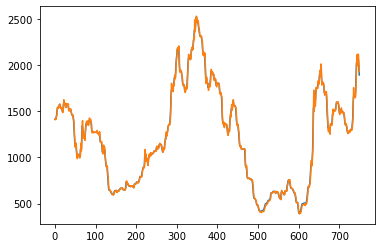

18.16690511067708


In [14]:
plt.plot(y_test)
plt.plot(predict)
plt.show()
print(metrics.mean_absolute_error(predict, y_test))

In [15]:
np.save('cnn1d.npy', predict)

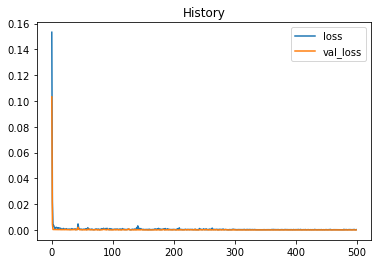

In [15]:
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.title('History')
plt.legend()
plt.show()